In [1]:
pyodbc.drivers()

NameError: name 'pyodbc' is not defined

In [1]:
import pyodbc
import pandas as pd  # Import the Pandas library

# Define las credenciales de conexión
server = "sqlplnserver.database.windows.net"
database = "DB_TablesPLN"
username = "username"
password = "password"

# Crea una conexión a la base de datos
connection = pyodbc.connect(
    f"Driver={'ODBC Driver 18 for SQL Server'};Server={server};Database={database};Uid={username};Pwd={password};TrustServerCertificate=yes"
)

# Realiza la consulta SQL
cursor = connection.cursor()
cursor.execute(
    """
SELECT TOP (100000) 
      [NombreArchivo]
      ,[Pais]
      ,[Ano]
      ,[NombrePresidente]
      ,[ApellidoPresidente]
      ,[Palabras]
      ,[ConteoPalabras]
      ,[PalabraLematizada]
      ,[Sentimiento]
  FROM [dbo].[DimTokenizacion]
"""
)
# Crea una lista con los títulos de las columnas
columnas = [
    "NombreArchivo",
    "Pais",
    "Ano",
    "NombrePresidente",
    "ApellidoPresidente",
    "Palabras",
    "ConteoPalabras",
    "PalabraLematizada",
    "Sentimiento",
]
# Obtén los resultados de la consulta como listas
rows = [columnas] + [list(row) for row in cursor.fetchall()]

# Crea un dataframe con los resultados de la consulta
df = pd.DataFrame(rows, columns=columnas)

# # Define la primera fila como los títulos de las columnas
df.columns = df.iloc[0]

# # Elimina la primera fila
df = df.iloc[1:]

# Cierra la conexión
connection.close()

# Imprime el dataframe
print(df)

0                             NombreArchivo       Pais   Ano NombrePresidente  \
1      Argentina_2022_Alberto_Fernandez.pdf  Argentina  2022          Alberto   
2      Argentina_2022_Alberto_Fernandez.pdf  Argentina  2022          Alberto   
3      Argentina_2022_Alberto_Fernandez.pdf  Argentina  2022          Alberto   
4      Argentina_2022_Alberto_Fernandez.pdf  Argentina  2022          Alberto   
5      Argentina_2022_Alberto_Fernandez.pdf  Argentina  2022          Alberto   
...                                     ...        ...   ...              ...   
86633           Peru_2023_Dina_Boluarte.pdf       Peru  2023             Dina   
86634           Peru_2023_Dina_Boluarte.pdf       Peru  2023             Dina   
86635           Peru_2023_Dina_Boluarte.pdf       Peru  2023             Dina   
86636           Peru_2023_Dina_Boluarte.pdf       Peru  2023             Dina   
86637           Peru_2023_Dina_Boluarte.pdf       Peru  2023             Dina   

0     ApellidoPresidente   

In [2]:
import seaborn as sns
import pandas as pd

# Obtiene el tipo de variable de cada columna
tipos_variables = df.dtypes

# Imprime el tipo de variable de cada columna
for columna, tipo_variable in tipos_variables.items():
    print(f"Columna: {columna}, Tipo de variable: {tipo_variable}")

Columna: NombreArchivo, Tipo de variable: object
Columna: Pais, Tipo de variable: object
Columna: Ano, Tipo de variable: object
Columna: NombrePresidente, Tipo de variable: object
Columna: ApellidoPresidente, Tipo de variable: object
Columna: Palabras, Tipo de variable: object
Columna: ConteoPalabras, Tipo de variable: object
Columna: PalabraLematizada, Tipo de variable: object
Columna: Sentimiento, Tipo de variable: object


In [3]:
# Estadísticas descriptivas
df.head()

,NombreArchivo,Pais,Ano,NombrePresidente,ApellidoPresidente,Palabras,ConteoPalabras,PalabraLematizada,Sentimiento
1,Argentina_2022_Alberto_Fernandez.pdf,Argentina,2022,Alberto,Fernandez,Palabras,8,Palabras,0.0
2,Argentina_2022_Alberto_Fernandez.pdf,Argentina,2022,Alberto,Fernandez,presidente,10,presidente,0.0
3,Argentina_2022_Alberto_Fernandez.pdf,Argentina,2022,Alberto,Fernandez,Nación,6,Nación,0.0
4,Argentina_2022_Alberto_Fernandez.pdf,Argentina,2022,Alberto,Fernandez,Alberto,7,Alberto,0.0
5,Argentina_2022_Alberto_Fernandez.pdf,Argentina,2022,Alberto,Fernandez,Fernández,9,Fernández,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86637 entries, 1 to 86637
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   NombreArchivo       86637 non-null  object
 1   Pais                86637 non-null  object
 2   Ano                 86637 non-null  object
 3   NombrePresidente    86637 non-null  object
 4   ApellidoPresidente  86637 non-null  object
 5   Palabras            86637 non-null  object
 6   ConteoPalabras      86637 non-null  object
 7   PalabraLematizada   86637 non-null  object
 8   Sentimiento         86637 non-null  object
dtypes: object(9)
memory usage: 5.9+ MB


In [6]:
# esta es para toda la union de tabla
df["Ano"] = df["Ano"].astype("int")
df["ConteoPalabras"] = df["ConteoPalabras"].astype("int")
df["Sentimiento"] = pd.to_numeric(df["Sentimiento"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86637 entries, 1 to 86637
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NombreArchivo       86637 non-null  object 
 1   Pais                86637 non-null  object 
 2   Ano                 86637 non-null  int32  
 3   NombrePresidente    86637 non-null  object 
 4   ApellidoPresidente  86637 non-null  object 
 5   Palabras            86637 non-null  object 
 6   ConteoPalabras      86637 non-null  int32  
 7   PalabraLematizada   86637 non-null  object 
 8   Sentimiento         86637 non-null  float64
dtypes: float64(1), int32(2), object(6)
memory usage: 5.3+ MB


In [7]:
df.describe()

,Ano,ConteoPalabras,Sentimiento
count,86637.000000,86637.000000,86637.000000
mean,2019.366887,5.374955,0.000316
std,2.645197,3.603247,0.025446
min,2014.000000,1.000000,-1.000000
25%,2018.000000,2.000000,0.000000
50%,2019.000000,5.000000,0.000000
75%,2022.000000,8.000000,0.000000
max,2023.000000,27.000000,0.800000


In [8]:
df.shape

(86637, 9)

In [9]:
df.columns.values

array(['NombreArchivo', 'Pais', 'Ano', 'NombrePresidente',
       'ApellidoPresidente', 'Palabras', 'ConteoPalabras',
       'PalabraLematizada', 'Sentimiento'], dtype=object)

In [10]:
# Obtiene los valores únicos de la columna "nombre"
valores_unicos = df["NombrePresidente"].unique()

# Imprime los valores únicos
print(valores_unicos)

df2 = df

['Alberto' 'Javier' 'Ivan' 'Ollanta' 'Pedro' 'Martin' 'Gustavo' 'Dina']


In [11]:
import category_encoders as ce
import pandas as pd

# Selecciona las columnas deseadas de df2
df2_seleccion = df2[
    [
        "NombreArchivo",
        "Pais",
        "NombrePresidente",
        "ApellidoPresidente",
        "Palabras",
        "PalabraLematizada",
    ]
]
df2_seleccion.head()

,NombreArchivo,Pais,NombrePresidente,ApellidoPresidente,Palabras,PalabraLematizada
1,Argentina_2022_Alberto_Fernandez.pdf,Argentina,Alberto,Fernandez,Palabras,Palabras
2,Argentina_2022_Alberto_Fernandez.pdf,Argentina,Alberto,Fernandez,presidente,presidente
3,Argentina_2022_Alberto_Fernandez.pdf,Argentina,Alberto,Fernandez,Nación,Nación
4,Argentina_2022_Alberto_Fernandez.pdf,Argentina,Alberto,Fernandez,Alberto,Alberto
5,Argentina_2022_Alberto_Fernandez.pdf,Argentina,Alberto,Fernandez,Fernández,Fernández


In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in [
    "NombreArchivo",
    "Pais",
    "NombrePresidente",
    "ApellidoPresidente",
    "Palabras",
    "PalabraLematizada",
]:
    df2_seleccion[col] = encoder.fit_transform(df2_seleccion[col])

df2["NombreArchivo_codificado"] = df2_seleccion["NombreArchivo"]
df2["Pais_codificado"] = df2_seleccion["Pais"]
df2["NombrePresidente_codificado"] = df2_seleccion["NombrePresidente"]
df2["ApellidoPresidente_codificado"] = df2_seleccion["ApellidoPresidente"]
df2["Palabras_codificado"] = df2_seleccion["Palabras"]
df2["PalabraLematizada_codificado"] = df2_seleccion["PalabraLematizada"]
df2_seleccion.head()

df2 = pd.concat([df2, df2_seleccion], axis=1)

df2.head()

C:\Users\linkl\AppData\Local\Temp\ipykernel_16376\2697318024.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_seleccion[col] = encoder.fit_transform(df2_seleccion[col])
C:\Users\linkl\AppData\Local\Temp\ipykernel_16376\2697318024.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_seleccion[col] = encoder.fit_transform(df2_seleccion[col])
C:\Users\linkl\AppData\Local\Temp\ipykernel_16376\2697318024.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,NombreArchivo,Pais,Ano,NombrePresidente,ApellidoPresidente,Palabras,ConteoPalabras,PalabraLematizada,Sentimiento,NombreArchivo_codificado,...,NombrePresidente_codificado,ApellidoPresidente_codificado,Palabras_codificado,PalabraLematizada_codificado,NombreArchivo,Pais,NombrePresidente,ApellidoPresidente,Palabras,PalabraLematizada
1,Argentina_2022_Alberto_Fernandez.pdf,Argentina,2022,Alberto,Fernandez,Palabras,8,Palabras,0.0,0,...,0,3,4635,4635,0,0,0,3,4635,4635
2,Argentina_2022_Alberto_Fernandez.pdf,Argentina,2022,Alberto,Fernandez,presidente,10,presidente,0.0,0,...,0,3,13551,13550,0,0,0,3,13551,13550
3,Argentina_2022_Alberto_Fernandez.pdf,Argentina,2022,Alberto,Fernandez,Nación,6,Nación,0.0,0,...,0,3,4476,4476,0,0,0,3,4476,4476
4,Argentina_2022_Alberto_Fernandez.pdf,Argentina,2022,Alberto,Fernandez,Alberto,7,Alberto,0.0,0,...,0,3,2684,2684,0,0,0,3,2684,2684
5,Argentina_2022_Alberto_Fernandez.pdf,Argentina,2022,Alberto,Fernandez,Fernández,9,Fernández,0.0,0,...,0,3,3698,3698,0,0,0,3,3698,3698


In [15]:
df2.loc[:, df2.dtypes == "object"] = df2.select_dtypes(["object"]).apply(
    lambda x: x.astype("category")
)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86637 entries, 1 to 86637
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   NombreArchivo                  86637 non-null  category
 1   Pais                           86637 non-null  category
 2   Ano                            86637 non-null  int32   
 3   NombrePresidente               86637 non-null  category
 4   ApellidoPresidente             86637 non-null  category
 5   Palabras                       86637 non-null  category
 6   ConteoPalabras                 86637 non-null  int32   
 7   PalabraLematizada              86637 non-null  category
 8   Sentimiento                    86637 non-null  float64 
 9   NombreArchivo_codificado       86637 non-null  int64   
 10  Pais_codificado                86637 non-null  int64   
 11  NombrePresidente_codificado    86637 non-null  int64   
 12  ApellidoPresidente_codificado  8

In [16]:
data2 = df2
data2 = data2.drop(
    columns=[
        "NombreArchivo",
        "Pais",
        "NombrePresidente",
        "ApellidoPresidente",
        "Palabras",
        "PalabraLematizada",
    ],
    errors="ignore",
)
data2.head()

,Ano,ConteoPalabras,Sentimiento,NombreArchivo_codificado,Pais_codificado,NombrePresidente_codificado,ApellidoPresidente_codificado,Palabras_codificado,PalabraLematizada_codificado
1,2022,8,0.0,0,0,0,3,4635,4635
2,2022,10,0.0,0,0,0,3,13551,13550
3,2022,6,0.0,0,0,0,3,4476,4476
4,2022,7,0.0,0,0,0,3,2684,2684
5,2022,9,0.0,0,0,0,3,3698,3698


In [17]:
data2.shape

(86637, 9)

In [18]:
""" is any missing values across columns"""
data2.isnull().any()

0
Ano                              False
ConteoPalabras                   False
Sentimiento                      False
NombreArchivo_codificado         False
Pais_codificado                  False
NombrePresidente_codificado      False
ApellidoPresidente_codificado    False
Palabras_codificado              False
PalabraLematizada_codificado     False
dtype: bool

In [19]:
""" count of missing values of the entire dataframe"""
data2.isnull().sum().sum()

0

In [20]:
data2.isnull().sum()

0
Ano                              0
ConteoPalabras                   0
Sentimiento                      0
NombreArchivo_codificado         0
Pais_codificado                  0
NombrePresidente_codificado      0
ApellidoPresidente_codificado    0
Palabras_codificado              0
PalabraLematizada_codificado     0
dtype: int64

In [21]:
import pandas as pd

total = data2.isnull().sum().sort_values(ascending=False)
percent_1 = data2.isnull().sum() / data2.isnull().count() * 100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=["Total", "%"])
missing_data

,Total,%
0,,
Ano,0,0.0
ConteoPalabras,0,0.0
Sentimiento,0,0.0
NombreArchivo_codificado,0,0.0
Pais_codificado,0,0.0
NombrePresidente_codificado,0,0.0
ApellidoPresidente_codificado,0,0.0
Palabras_codificado,0,0.0
PalabraLematizada_codificado,0,0.0


In [22]:
data2.describe()

,Ano,ConteoPalabras,Sentimiento,NombreArchivo_codificado,Pais_codificado,NombrePresidente_codificado,ApellidoPresidente_codificado,Palabras_codificado,PalabraLematizada_codificado
count,86637.000000,86637.000000,86637.000000,86637.000000,86637.000000,86637.000000,86637.000000,86637.000000,86637.000000
mean,2019.366887,5.374955,0.000316,8.355806,1.861272,4.696481,4.933943,6927.484631,6926.985122
std,2.645197,3.603247,0.025446,3.354252,0.445694,1.967359,3.224034,5405.653424,5405.226092
min,2014.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,2.000000,0.000000,7.000000,2.000000,5.000000,1.000000,1509.000000,1509.000000
50%,2019.000000,5.000000,0.000000,8.000000,2.000000,5.000000,6.000000,6690.000000,6689.000000
75%,2022.000000,8.000000,0.000000,11.000000,2.000000,6.000000,8.000000,12025.000000,12024.000000
max,2023.000000,27.000000,0.800000,13.000000,2.000000,7.000000,8.000000,16406.000000,16405.000000


NameError: name 'plt' is not defined

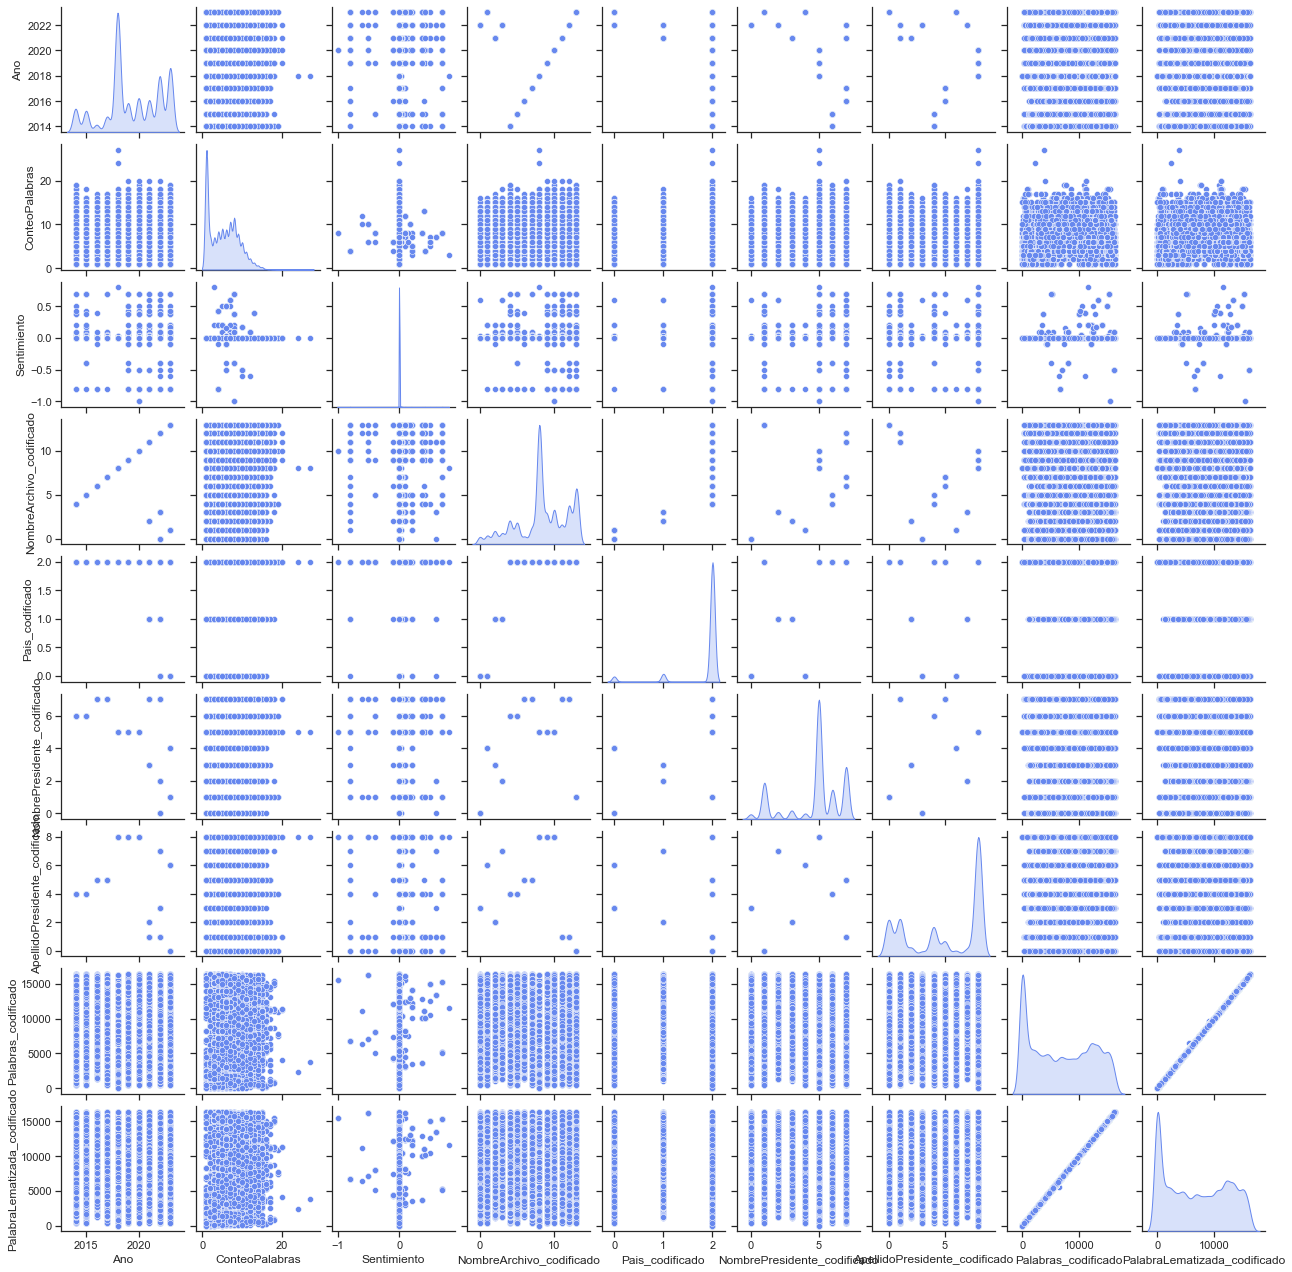

In [23]:
# Establecer el estilo y los colores
sns.set(style="ticks", palette="coolwarm")

# Generar el gráfico pairplot
sns.pairplot(data2, height=2, diag_kind="kde", palette="coolwarm")

# Personalizar las etiquetas de los ejes
plt.xlabel("Variable X")
plt.ylabel("Variable Y")

# Añadir un título al gráfico
plt.title("Gráfico de dispersión de las variables")

# Mostrar el gráfico
plt.show()

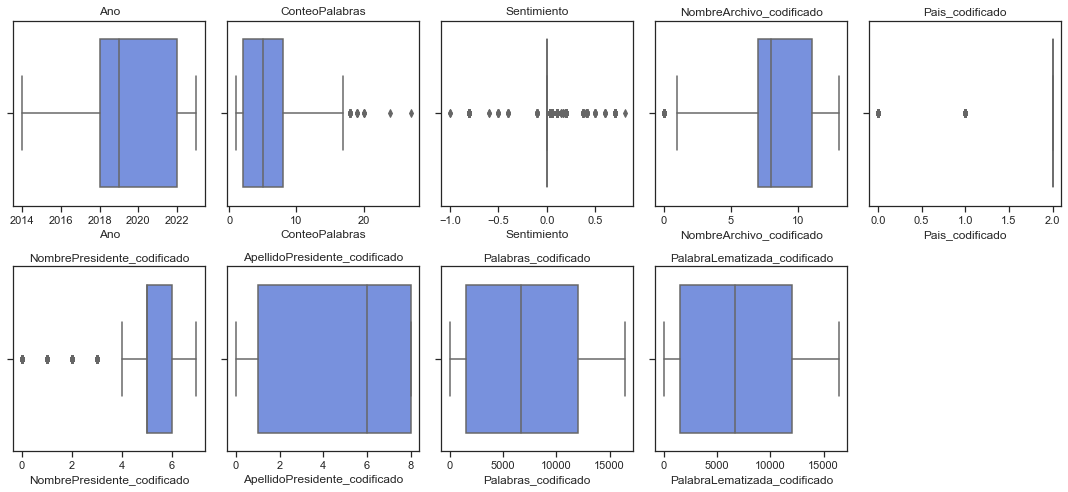

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))  # Establece el tamaño del gráfico

# Selecciona las columnas relevantes (excluyendo "quality")
columns = [
    "Ano",
    "ConteoPalabras",
    "Sentimiento",
    "NombreArchivo_codificado",
    "Pais_codificado",
    "NombrePresidente_codificado",
    "ApellidoPresidente_codificado",
    "Palabras_codificado",
    "PalabraLematizada_codificado",
]
color_palette = sns.color_palette(
    "coolwarm"
)  # Ajustar el brillo de la paleta de colores

# Genera los gráficos de cajas para las columnas seleccionadas
for i, col in enumerate(columns):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(x=data2[col])
    plt.title(col)
plt.tight_layout()  # Ajusta el espaciado entre los gráficos
plt.show()  # Muestra los gráficos de cajas

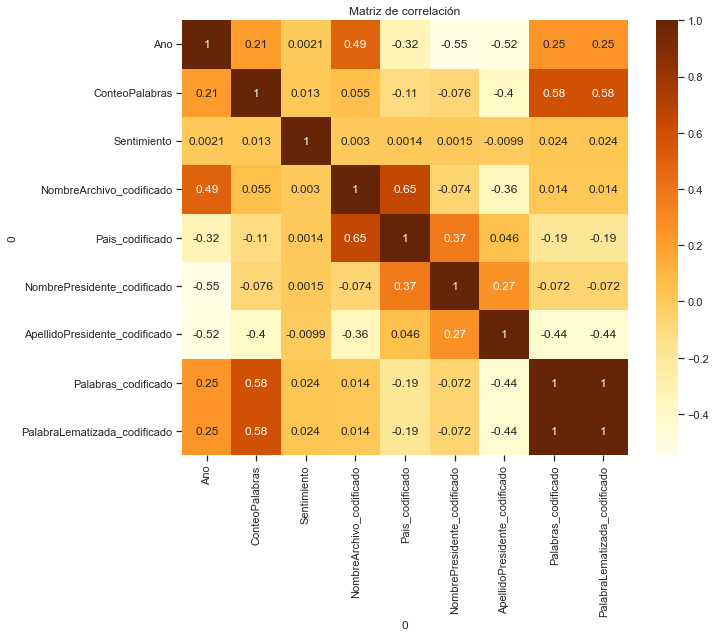

In [26]:
correlation_matrix = data2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlOrBr")
plt.title("Matriz de correlación")
plt.show()